In [1]:
from keras.datasets.mnist import load_data
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [2]:
# load the data - it returns 2 tuples of digits & labels - one for
# the train set & the other for the test set
(train_digits, train_labels), (test_digits, test_labels) = load_data()
#  some variables...
image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 1  # we have grayscale images
#NOTE: image_height == image_width == 28
# re-shape the images data
train_data = np.reshape(train_digits, (train_digits.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(test_digits, (test_digits.shape[0],image_height, image_width, num_channels))

# re-scale the image data to values between [0,1]
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

# one-hot encode the labels - we have 10 output classes

# so 3 -> [0 0 0 1 0 0 0 0 0 0], 5 -> [0 0 0 0 0 1 0 0 0 0] & so on
num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)

# split training set into training and validation
train_data2, val_data,train_labels_cat2,  val_labels = train_test_split(train_data, train_labels_cat, test_size=0.1)

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
def build_model():
    model = Sequential()
    # add Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Flatten())
    # Densely connected layers
    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()

In [4]:
history = model.fit(train_data2, train_labels_cat2, 
                    epochs=15, batch_size=64,
                    validation_data=(val_data, val_labels))

Epoch 1/15
844/844 [==============================] - 27s 29ms/step - loss: 0.1779 - accuracy: 0.9436 - val_loss: 0.0632 - val_accuracy: 0.9790
Epoch 2/15
844/844 [==============================] - 25s 30ms/step - loss: 0.0468 - accuracy: 0.9855 - val_loss: 0.0492 - val_accuracy: 0.9843
Epoch 3/15
844/844 [==============================] - 26s 31ms/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0431 - val_accuracy: 0.9873
Epoch 4/15
844/844 [==============================] - 27s 32ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0344 - val_accuracy: 0.9895
Epoch 5/15
844/844 [==============================] - 24s 29ms/step - loss: 0.0202 - accuracy: 0.9932 - val_loss: 0.0411 - val_accuracy: 0.9873
Epoch 6/15
844/844 [==============================] - 25s 30ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0373 - val_accuracy: 0.9862
Epoch 7/15
844/844 [==============================] - 25s 30ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0363 - val_accuracy:

In [5]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels_cat, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

157/157 [==============================] - 1s 9ms/step - loss: 0.0406 - accuracy: 0.9921
Test loss: 0.0406 accuracy: 0.9921


[]

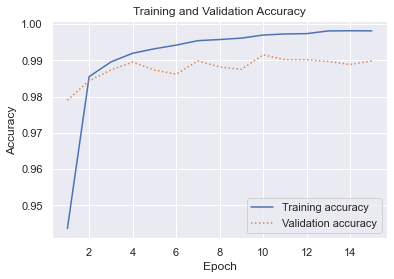

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()